# Regression

Regression is the process of predicting a continuous value.<br>
### Applications of regression include 
- Sales forecasting
- Satisfaction analysis 
- Price estimation 
- Employment income

### Types of Regression 
- Ordinal Regression
- Poisson Regression
- Fast forest quantile Regression
- Linear, Polynomial, Lasso, Stepwise, Ridge Regression
- Bayesian linear Regression
- Neural network Regression
- Decision forest Regression
- Boosted decision tree Regression
- KNN(K-nearest neighbour) 

## Linear Regression 
It is the approximation of linear model used to describe the relation ship between two or more variables. <br>
In linear regression there are two variables dependent and independent variables. <br> 
There are two types of linear regression. 
 - Simple linear regession uses one independent variable used to estimate dependent variable. 
 - Multiple linear regression uses more than one independent variables are used to estimate dependent variable.


### Simple Linear Regression mathematical equation : 
$$\hat{Y} = \hat{B}_{0} + \hat{B}_{1} * x $$ <br>
$\hat{B}_{0}$ = Intercept <br>
$\hat{B}_{1}$ = Slope<br>
x = Independent Variable <br>
### Error  
It is the measure of how far the data is from the fitted regression
#### Mean Absolute Error : $$\frac{1}{n}\sum\limits _{i=1} ^{n} |y_{i} - \hat{y}_{i}|$$ <br>
$y_{i}$ = Actual Value <br>
$\hat{y}_{i}$ = Predicted Value

#### Slope $${B}_{1}  = \frac{\sum\limits _{i=1} ^{s}(x_{i} -\hat{x}) * (y_{i} -\hat{y})}{\sum\limits _{i=1} ^{s}(x_{i} -
\hat{x})}$$ <br>
$${B}_{0} = \hat{Y} - {B}_{1} * \hat{x} $$ 
$\hat{x}$ = mean of x variables <br>
$\hat{y}$ = mean of y variables <br>
### Mean Squared Error  $$\frac{1}{n} \sum\limits _{i=1} ^{n} (y_{i} - \hat{y}_{i})^2$$

### Relative Absolute Error $$\frac{\sum\limits _{i=1} ^{n} |y_{i} - \hat{y}_{i}|}{\sum\limits _{i=1} ^{n} |y_{i} - mean(y)|}$$

### Relative Square Error $$\frac{\sum\limits _{i=1} ^{n} |y_{i} - \hat{y}_{i}|^2}{\sum\limits _{i=1} ^{n} |y_{i} - mean(y)|^2}$$

### R-Squared $$R^2 = 1 - Relative Square Error$$

### Pros of Linear Regression
- Very Fast.
- Easily Understandable, and highly interpretable.
- No paramter tuning.

### Model Evaluation approach
- Train and test on same data set. 
    - Test set is the portion of train set.
    - High "Training accuracy".
    - Low "Out-of-sample accuracy".
- Train/Test split dataset.
    - Mutually Exclusive.
    - More accurate evaluation on out-of-sample accuracy.
    - Highly dependent on which datasets the data is trained and tested.

#### Training Accuracy : 
Training accuracy is the percentage of correct predictions that the model makes when using the test dataset.

#### Out-of-sample Accuracy :
Out-of-sample accuracy is the percentage of correct predictions that the model makes on data that the model has not been trained on. 

### Overfitting : 
The model is overly trained to the dataset, which may capture noise and produce a non-generalized model.

# Linear Regression

### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score


### Loading the data and selecting the features for the training

In [2]:
data = pd.read_csv("FuelConsumptionCo2.csv")
selected_data = data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

In [3]:
# Splitting data into 80% training and 20% testing data 
msk = np.random.rand(len(data)) < 0.8
train = selected_data[msk]
test = selected_data[~msk]

In [4]:
regression = linear_model.LinearRegression()
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])
regression.fit(x_train, y_train)

LinearRegression()

In [5]:
print("Co-efficients : {}".format(regression.coef_))
print("Intercept : {}".format(regression.intercept_))

Co-efficients : [[38.42633417]]
Intercept : [127.30768908]


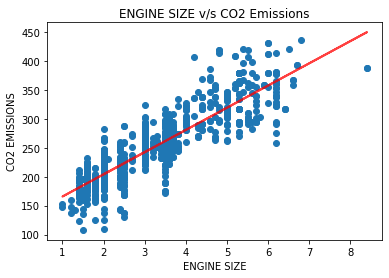

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(x_train, regression.coef_[0][0] * x_train + regression.intercept_, "-r", linewidth=2, alpha=0.75)
plt.title("ENGINE SIZE v/s CO2 Emissions")
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

In [7]:
x_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])
y_predict = regression.predict(x_test)

In [8]:
print("Mean absolute error : {0:.2f}".format(np.mean(np.absolute(y_predict - y_test))))
print("Residual sum of squares (MSE) : {0:.2f}".format(np.mean((y_predict - y_test) ** 2)))
print("R2-score : {0:.2f}".format(r2_score(y_test, y_predict)))

Mean absolute error : 22.55
Residual sum of squares (MSE) : 945.94
R2-score : 0.78
